In [1]:
'''
This script uses the SamenvoegenCSV_metermonitoring dataset (xlsx format)
and the EV Charging behaviours - Gent dataset (xlsx format)
It plots the average total power consumption per hour
The average number of cars charging is also plotted
'''

'\nThis script uses the SamenvoegenCSV_metermonitoring dataset (xlsx format)\nand the EV Charging behaviours - Gent dataset (xlsx format)\nIt plots the average total power consumption per hour\nThe average number of cars charging is also plotted\n'

In [2]:
import numpy as np
import datetime as dt
import sklearn
import pandas as pd
from sklearn import preprocessing 

In [3]:
# read data


df = pd.read_excel (r'Data/SamenvoegenCSV_metermonitoring.xlsx')
X=df.copy()

In [4]:
# select power format of data

df_power = X[X['Extra info'] =="Actief vermogen totaal"]


In [5]:
# sum powers of circuits of same timestamp
# skip the first timestamp as it is a sample reading


indices=df_power.index.values

list_of_dates=[]
list_of_total_power=[]

counter=0
total_power=0
for i in range(4,len(indices)):
    counter=counter+1
    total_power=total_power+df_power.loc[indices[i]]["Meetwaarde"]
    if counter==4:
        counter=0
        list_of_total_power.append(total_power)
        total_power=0
        list_of_dates.append(df_power.loc[indices[i]]["Tijdstip"])

In [6]:
# group data per hour (sum and count)

from datetime import datetime


power_time_dict = {}
power_time_dict_we = {}


for i in range(len(list_of_dates)):
    date_time=list_of_dates[i]
    rounded_time=date_time.hour
    weekno = date_time.weekday()
    dict_to_use=power_time_dict
    if weekno > 4:
        dict_to_use=power_time_dict_we
    if date_time.time() in dict_to_use:
        dict_to_use[rounded_time][0]=dict_to_use[rounded_time][0]+list_of_total_power[i]
        dict_to_use[rounded_time][1]=dict_to_use[rounded_time][1]+1
    else:
        dict_to_use[rounded_time]=[list_of_total_power[i],1]
    

In [7]:
# reformat to get average (sum/count)

list_of_times=[]
list_of_powers=[]
for key in power_time_dict:
    list_of_times.append(key)
list_of_times=sorted(list_of_times)
for key in list_of_times:
    value=power_time_dict[key]
    list_of_powers.append(value[0]/(1000*value[1]))
    
list_of_times_we=[]
list_of_powers_we=[]
for key in power_time_dict_we:
    list_of_times_we.append(key)
list_of_times_we=sorted(list_of_times_we)
for key in list_of_times_we:
    value=power_time_dict_we[key]
    list_of_powers_we.append(value[0]/(1000*value[1]))


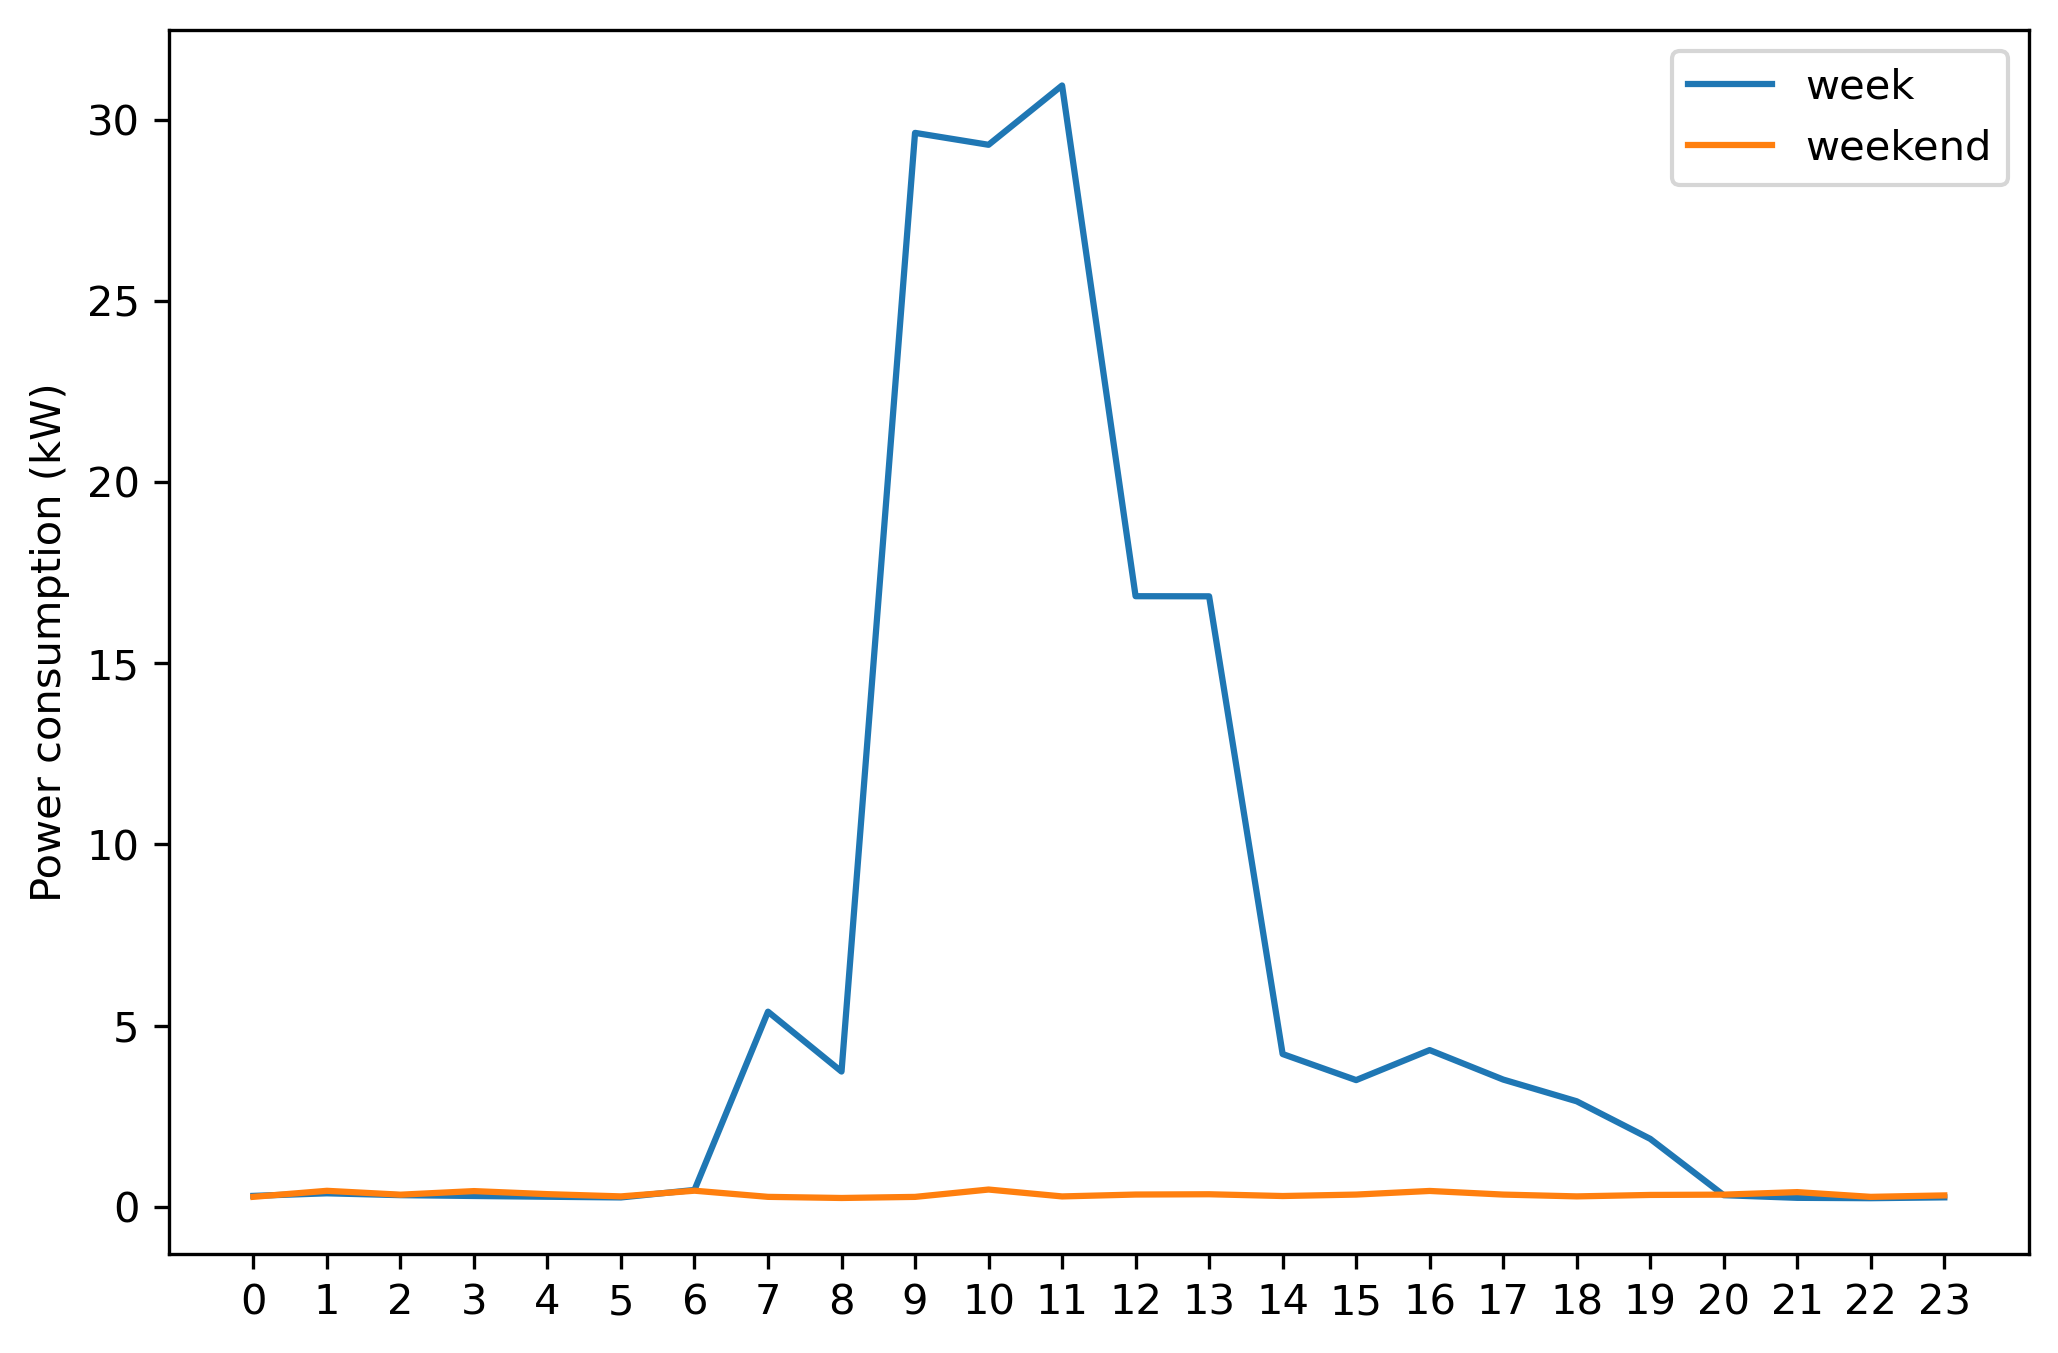

In [8]:
# plot average power per hour week and weekend

import matplotlib.pyplot as plt
import os
from matplotlib.pyplot import figure

x_labels=[]

current_hour=-1

for hour in list_of_times:
    if hour != current_hour:
        current_hour=hour
        x_labels.append(hour)
    else:
        x_labels.append("")
fig = plt.figure(figsize=(8, 6), dpi=300)
spacing = 0.2
fig.subplots_adjust(bottom=spacing)


plt.plot(range(len(list_of_times)), list_of_powers,label = "week")
plt.plot(range(len(list_of_times_we)), list_of_powers_we,label = "weekend")
plt.xticks((range(len(list_of_times))), x_labels)
plt.ylabel('Power consumption (kW)')

plt.legend()
plt.savefig(os.path.join('average power consumption during the day.png'), dpi=300, format='png')

In [9]:
import numpy as np
import datetime as dt
import sklearn
import pandas as pd
from sklearn import preprocessing 

In [10]:
# read data

df_charge_beh = pd.read_excel(r'Data/EV Charging behaviours - Gent.xlsx')
X_charging=df_charge_beh.copy()


In [11]:
# select time data

X_start_end=X_charging[['Start','Eind']]

In [12]:
# count number of cars charging each hour


from datetime import date, timedelta

sum=0

def daterange(start_date, end_date):
    for n in range(int((end_date - start_date).days)):
        yield start_date + timedelta(n)




charge_date_dict = {}
charge_date_dict_we = {}

for row in X_start_end.iterrows():
        start=row[1][0]
        end=row[1][1]

        start_hour=row[1][0].hour
        end_hour=row[1][1].hour

        for curr_date in daterange(start.date(), end.date()+ timedelta(days=1)):
            weekno = curr_date.weekday()
            dict_to_use=charge_date_dict
            if weekno > 4:
                dict_to_use=charge_date_dict_we

            if curr_date==start.date():
                start_iter=start_hour
            else:
                start_iter=0
            if curr_date==end.date():
                end_iter=end_hour
            else:
                end_iter=23 

            for hour in range(start_iter,end_iter+1):
                sum+=1
                curr_key=(hour)
                if curr_key in dict_to_use:
                    dict_to_use[curr_key]=dict_to_use[curr_key]+1
                else:
                    dict_to_use[curr_key]=1
print(sum)


3853


In [13]:
# number of days in dataset (see dataset)
# used to get average per day

nb_dates=309

In [14]:
# reformat to get average (count/nb_dates)


list_of_dates2=[]
list_of_values=[]
for key in charge_date_dict:
    list_of_dates2.append(key)
list_of_dates2=sorted(list_of_dates2)
for key in list_of_dates2:
    value=charge_date_dict[key]
    list_of_values.append(value/nb_dates)
    
list_of_dates_we2=[]
list_of_values_we=[]
for key in charge_date_dict_we:
    list_of_dates_we2.append(key)
list_of_dates_we2=sorted(list_of_dates_we2)
for key in list_of_dates_we2:
    value=charge_date_dict_we[key]
    list_of_values_we.append(value/nb_dates)
    


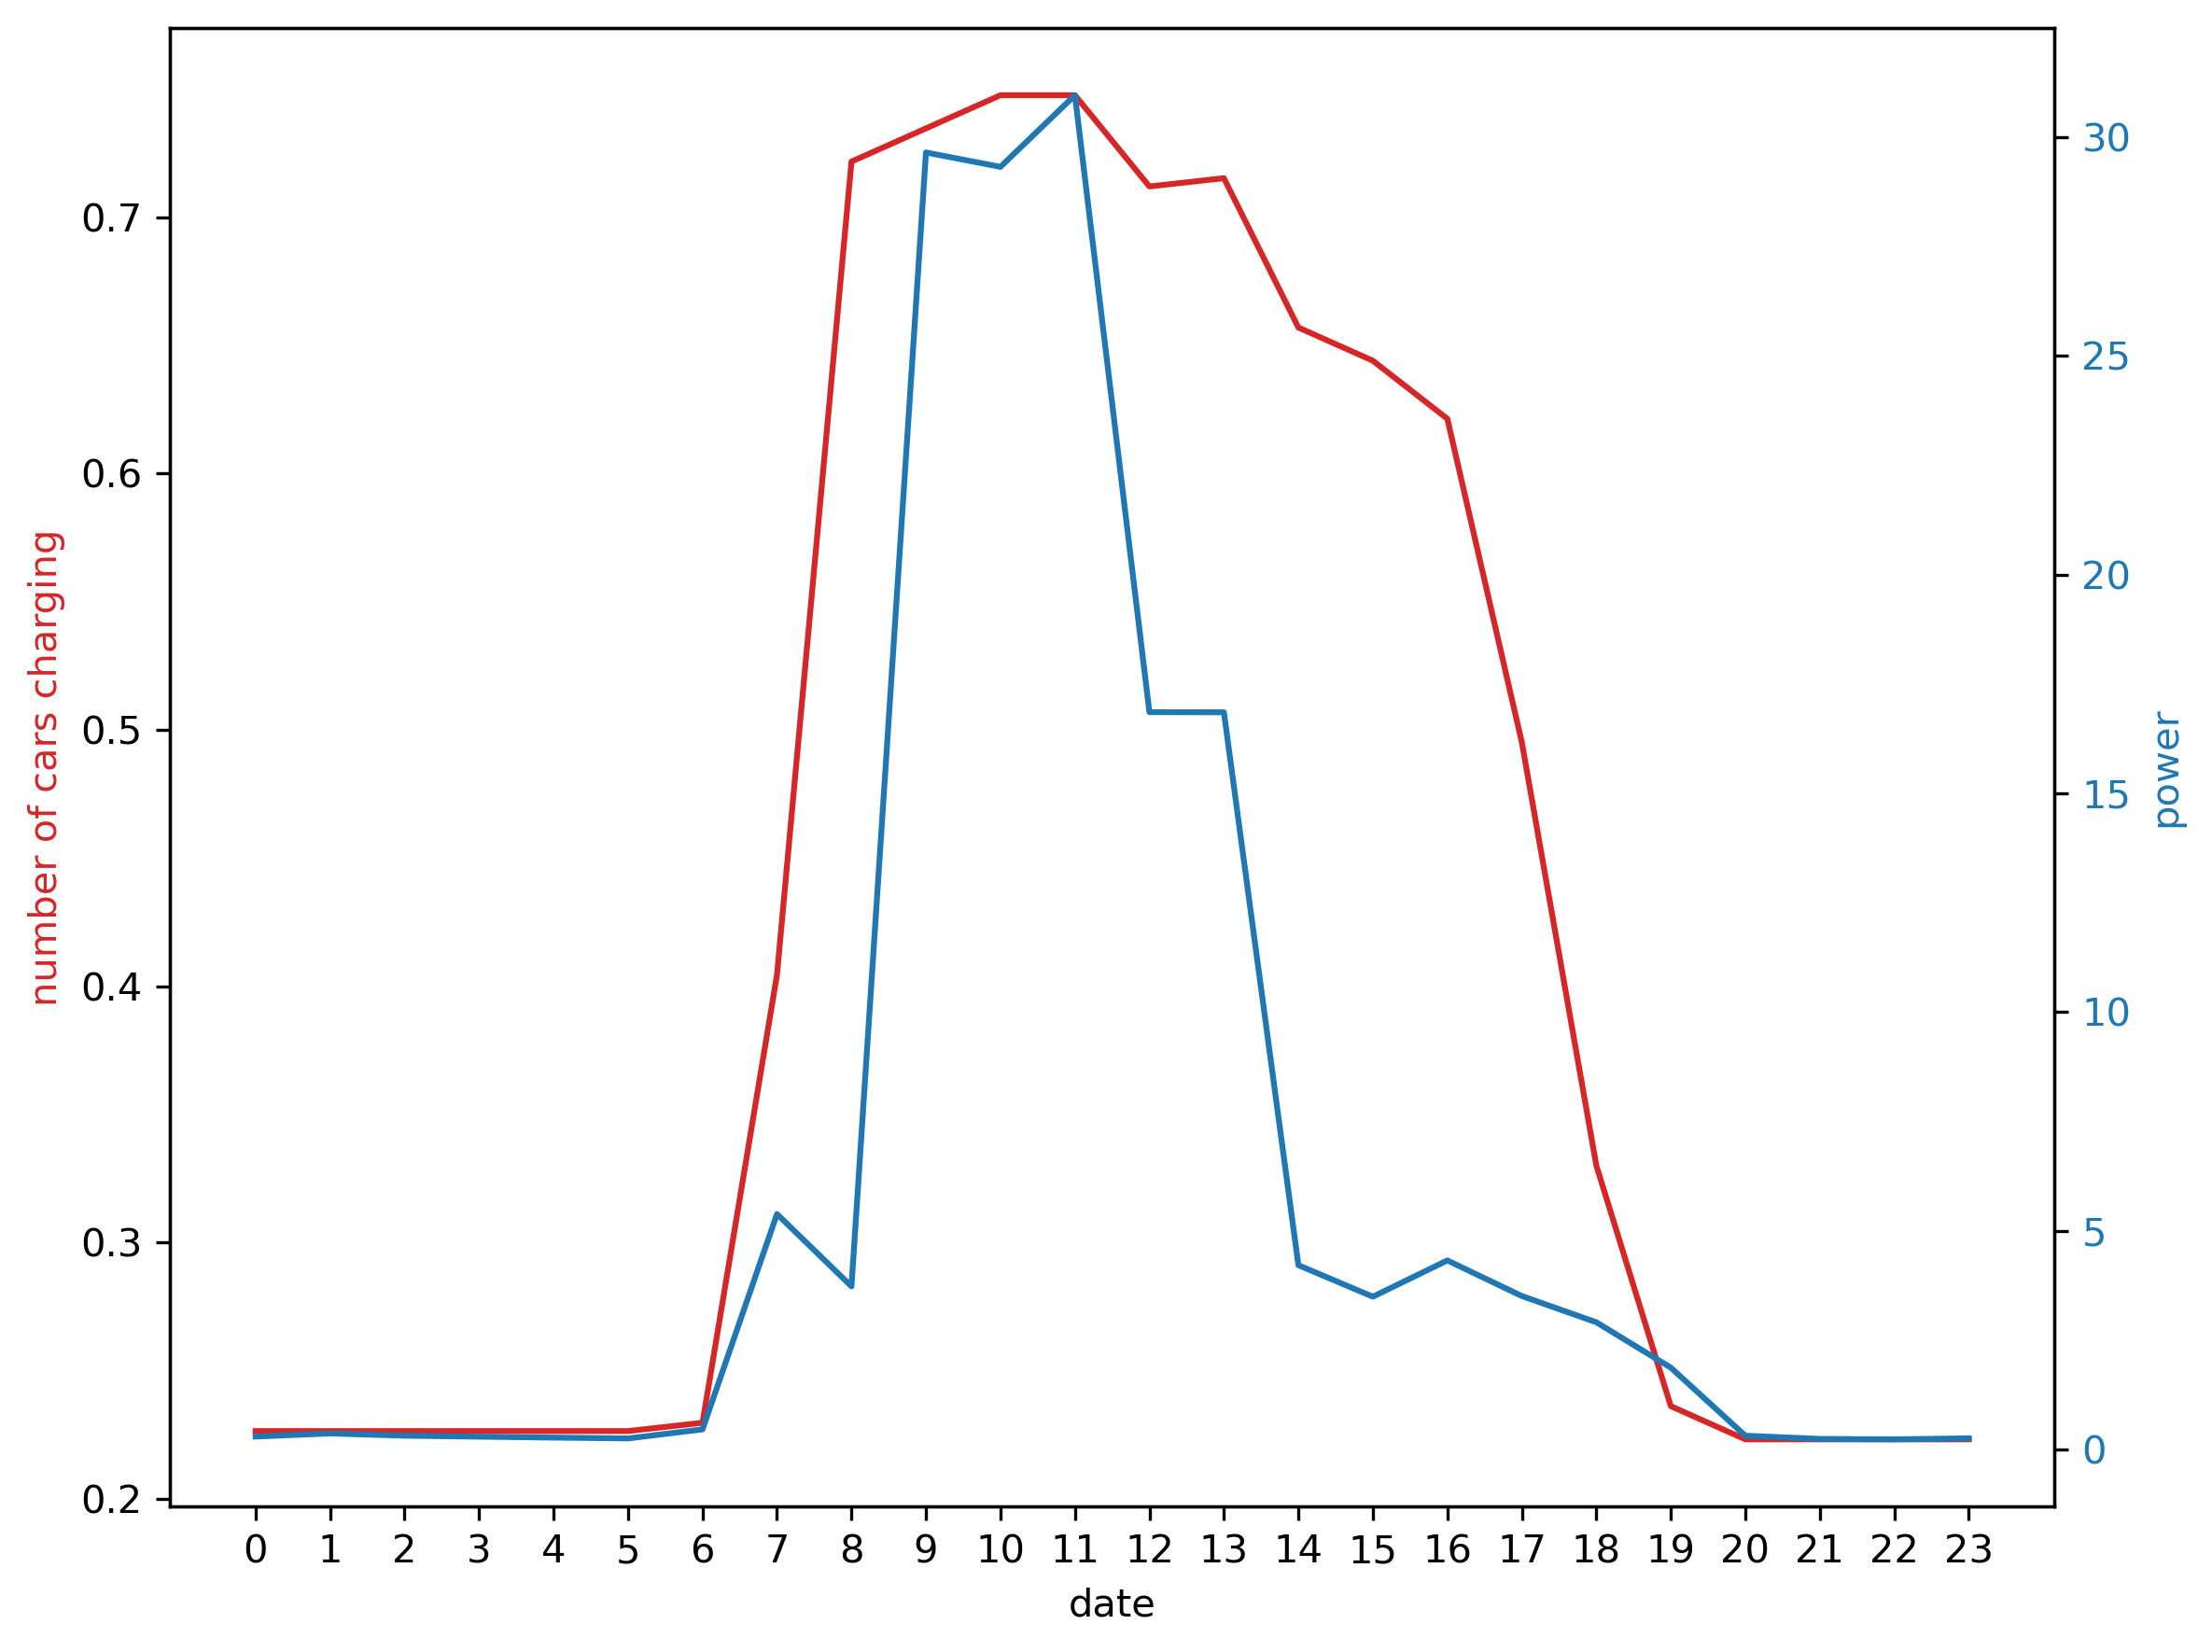

In [16]:
# plot number of cars charging and power consumption together


import numpy as np
import matplotlib.pyplot as plt


fig, ax1 = plt.subplots(figsize=(8, 6), dpi=300)
 

color = 'tab:red'
ax1.set_xlabel('date')
ax1.set_ylabel('number of cars charging', color=color)
ax1.plot(range(len(list_of_dates2)), list_of_values, color=color)
plt.xticks((range(len(list_of_dates2))), x_labels)
# ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx() 

color = 'tab:blue'
ax2.set_ylabel('power', color=color)  
ax2.plot(range(len(list_of_times)), list_of_powers, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout() 


fig.tight_layout()  
plt.savefig(os.path.join('avg number cars and power per hour.png'), dpi=300, format='png')
plt.show()
